In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_2014 = pd.read_stata('ESS7MDWe02.1/ESS7MDWe02.1_F1.dta')

#change country "GB" to "UK"
data_2014.loc[data_2014.cntry=='GB','cntry']='UK'

#if there's no low-level regional code (nuts2), insert the regional code from one above
data_2014.loc[data_2014.nuts2=='','nuts2']=data_2014.nuts1

In [3]:
data_2014['very_happy'] = data_2014.happy.isin(['8','9','Extremely happy'])
happy_by_country = data_2014[data_2014.very_happy == True].groupby('cntry')['ess7_id'].count()
all_by_country = data_2014.groupby('cntry')['ess7_id'].count()
happy_perc = pd.DataFrame(happy_by_country / all_by_country)

In [8]:
europe = gpd.read_file('NUTS_2013_60M_SH/data/NUTS_RG_60M_2013.shp')

In [9]:
# use only country-level data
europe_null = europe[europe.STAT_LEVL_==0]

# merge with happiness indicator

happy_perc = gpd.GeoDataFrame(happy_perc.merge(europe_null,left_index=True,right_on='NUTS_ID'))
happy_perc.crs = {'init': 'epsg:4326'}

In [10]:
happy_perc['happiness'] = happy_perc['ess7_id']*100

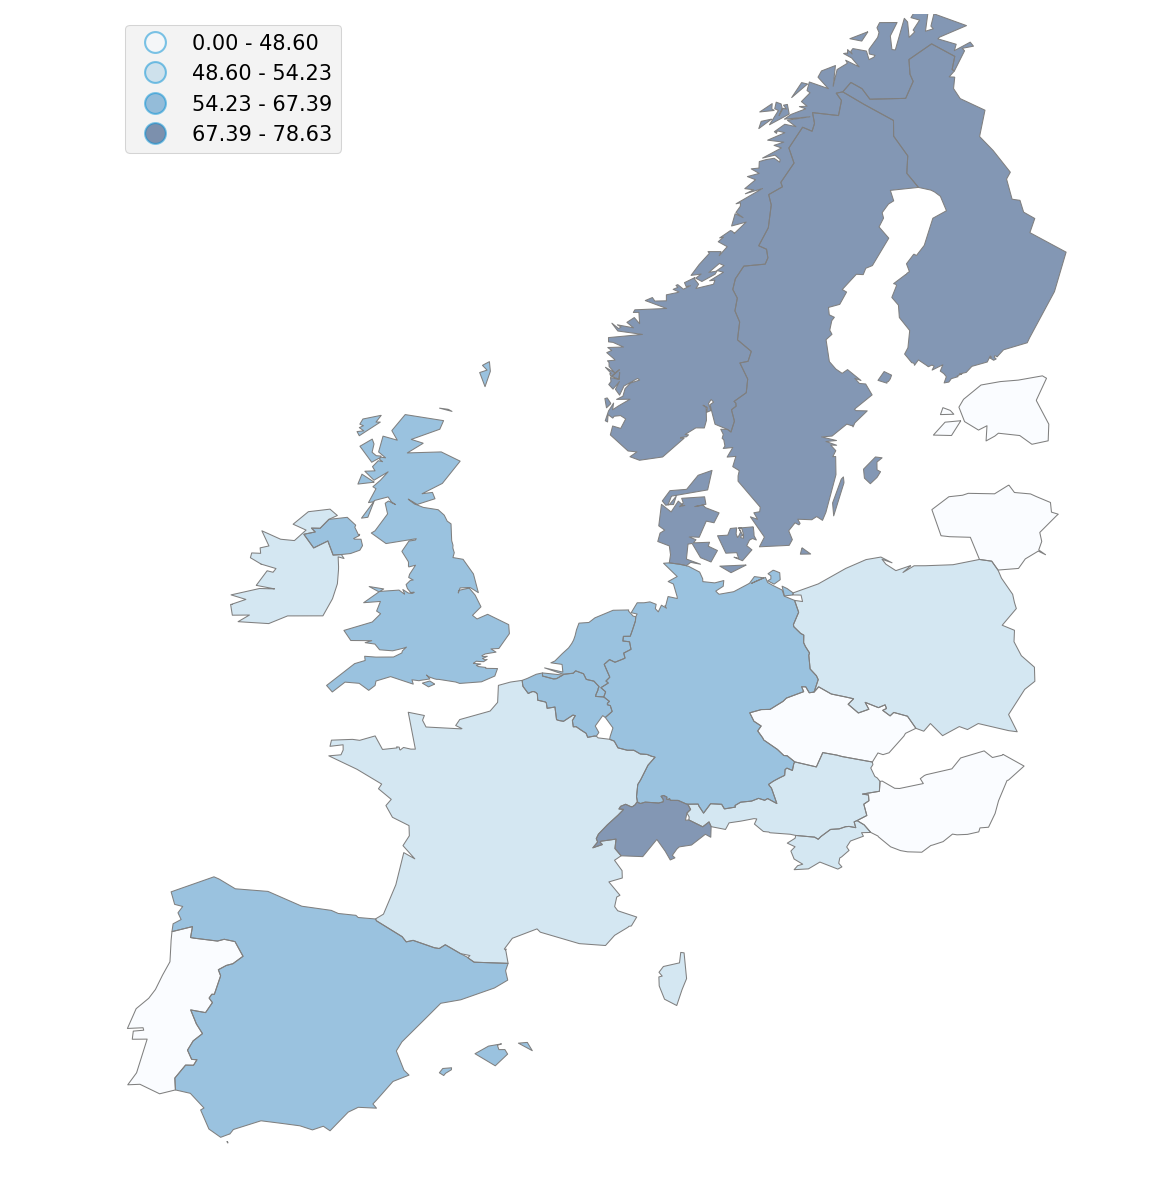

In [39]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(7.8)
fig.set_dpi(150)
ax = fig.gca()
plt.ylim([1550000, 5400000])
plt.xlim([2600000, 5600000])
ax.axis('off')
happy_perc.to_crs(epsg=3035).plot(column='happiness', scheme='QUANTILES', k=4, cmap='Blues',
                                    legend=True, edgecolor='grey', ax=ax, linewidth=0.5
                                 )

plt.savefig('map1.eps', format='eps', dpi=1000) 

In [54]:
happy_perc[happy_perc['NUTS_ID'] == 'SI'].sort_values('happiness')

,ess7_id,NUTS_ID,SHAPE_AREA,SHAPE_LEN,STAT_LEVL_,geometry,happiness
1720,0.499183,SI,2.297144,9.368307,0,"POLYGON ((16.59680500000002 46.47590249899997,...",49.918301


In [25]:
happy_by_country = data_2014[data_2014.happy.isin(['8','9','Extremely happy'])].groupby('nuts1')['ess7_id'].count()
all_by_country = data_2014.groupby('nuts1')['ess7_id'].count()
happy_perc_level1 = pd.DataFrame(happy_by_country / all_by_country)

In [13]:
# use regional-level data
europe_level1 = europe[europe.STAT_LEVL_== 1]

# merge with happiness indicator

happy_perc_level1_merged = gpd.GeoDataFrame(happy_perc_level1.merge(europe_level1,left_index=True,right_on='NUTS_ID'))
happy_perc_level1_merged.crs = {'init': 'epsg:4326'}

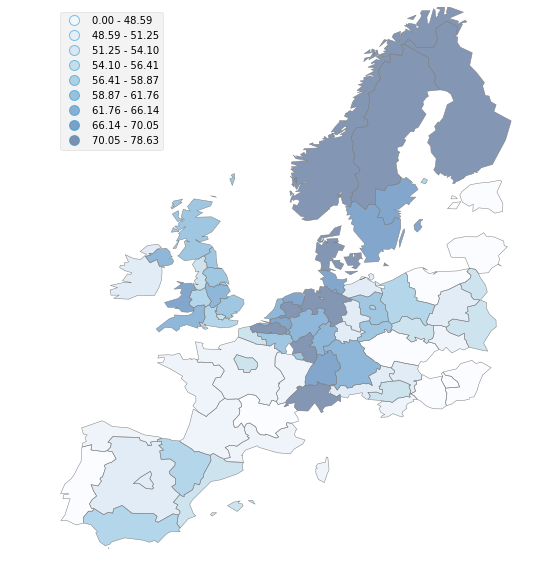

In [40]:
happy_perc_level1_merged['happiness'] = happy_perc_level1_merged['ess7_id']*100
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(7.8)
ax = fig.gca()
plt.ylim([1550000, 5400000])
plt.xlim([2600000, 5600000])
ax.axis('off')
happy_perc_level1_merged.to_crs(epsg=3035).plot(column='happiness', scheme='QUANTILES', k=9, cmap='Blues',
                                    legend=True, edgecolor='grey', ax=ax, linewidth=0.5
                                 )


In [86]:
europe.loc[europe['NUTS_ID'] == 'SI03', 'NUTS_ID'] = 'SI01'
europe.loc[europe['NUTS_ID'] == 'SI04', 'NUTS_ID'] = 'SI02'

In [80]:
happy_perc_level2

,ess7_id
nuts2,
,0.608577
AT11,0.586207
AT12,0.555556
AT13,0.520776
AT21,0.477876
AT22,0.600791
AT31,0.419940
AT32,0.483871
AT33,0.719178


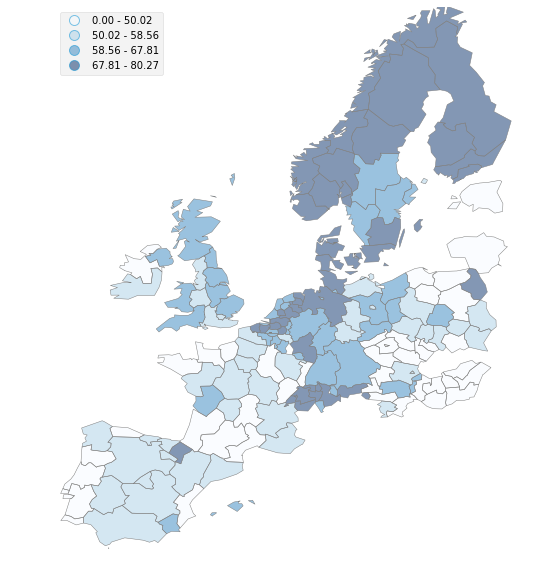

In [87]:
happy_by_country = data_2014[data_2014.happy.isin(['8','9','Extremely happy'])].groupby('nuts2')['ess7_id'].count()
all_by_country = data_2014.groupby('nuts2')['ess7_id'].count()
happy_perc_level2 = pd.DataFrame(happy_by_country / all_by_country)

# use regional-level data
europe_level2 = europe[((europe.STAT_LEVL_== 2) & (~europe.NUTS_ID.str.contains("DE") | ~europe.NUTS_ID.str.contains("UK") | ~europe.NUTS_ID.str.contains("SI"))) \
                     | ((europe.STAT_LEVL_== 1) & (europe.NUTS_ID.str.contains("DE") | europe.NUTS_ID.str.contains("UK")))]

# merge with happiness indicator

happy_perc_level2_merged = gpd.GeoDataFrame(happy_perc_level2.merge(europe_level2,left_index=True,right_on='NUTS_ID'))
happy_perc_level2_merged.crs = {'init': 'epsg:4326'}

happy_perc_level2_merged['happiness'] = happy_perc_level2_merged['ess7_id']*100
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(7.8)
ax = fig.gca()
plt.ylim([1550000, 5400000])
plt.xlim([2600000, 5600000])
ax.axis('off')
happy_perc_level2_merged.to_crs(epsg=3035).plot(column='happiness', scheme='QUANTILES', k=4, cmap='Blues',
                                    legend=True, edgecolor='grey', ax=ax, linewidth=0.5
                                 )

plt.savefig('map2.eps', format='eps', dpi=1000) 

In [15]:
data_2014 = data_2014.merge(happy_perc_level1,left_on='nuts1',right_index=True)

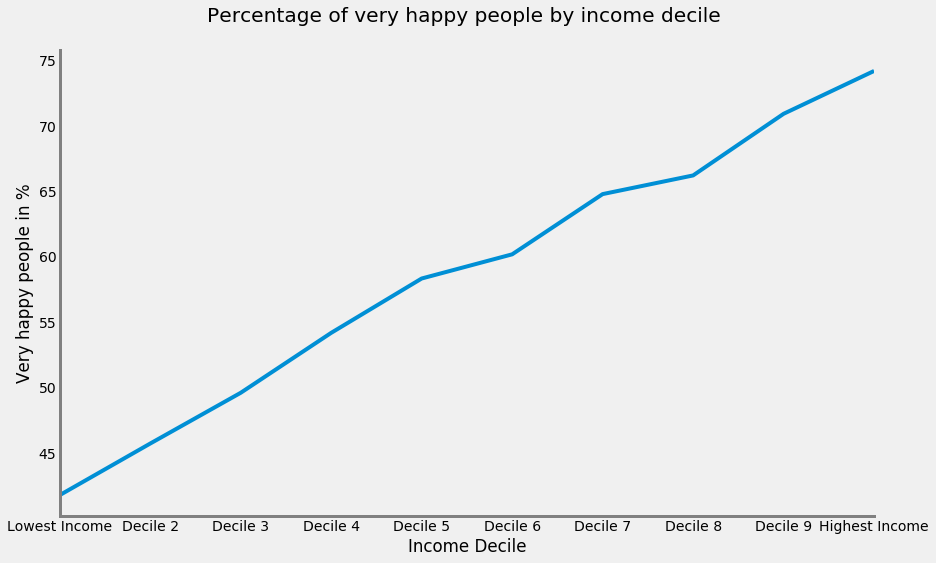

In [14]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

ax = (data_2014.groupby('hinctnta')['very_happy'].sum() / data_2014.groupby('hinctnta')['very_happy'].count() * 100).\
    plot(figsize=(13,8))

ax.set_title('Percentage of very happy people by income decile \n')
ax.yaxis.grid()
ax.xaxis.grid()

x = ['Lowest Income','Decile 2', 'Decile 3', 'Decile 4', 'Decile 5', 'Decile 6', 'Decile 7', 'Decile 8', 'Decile 9', 'Highest Income']

ax.set_xticklabels(x)
ax.set_xlabel('Income Decile')
ax.set_ylabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('income.eps', format='eps', dpi=100) 

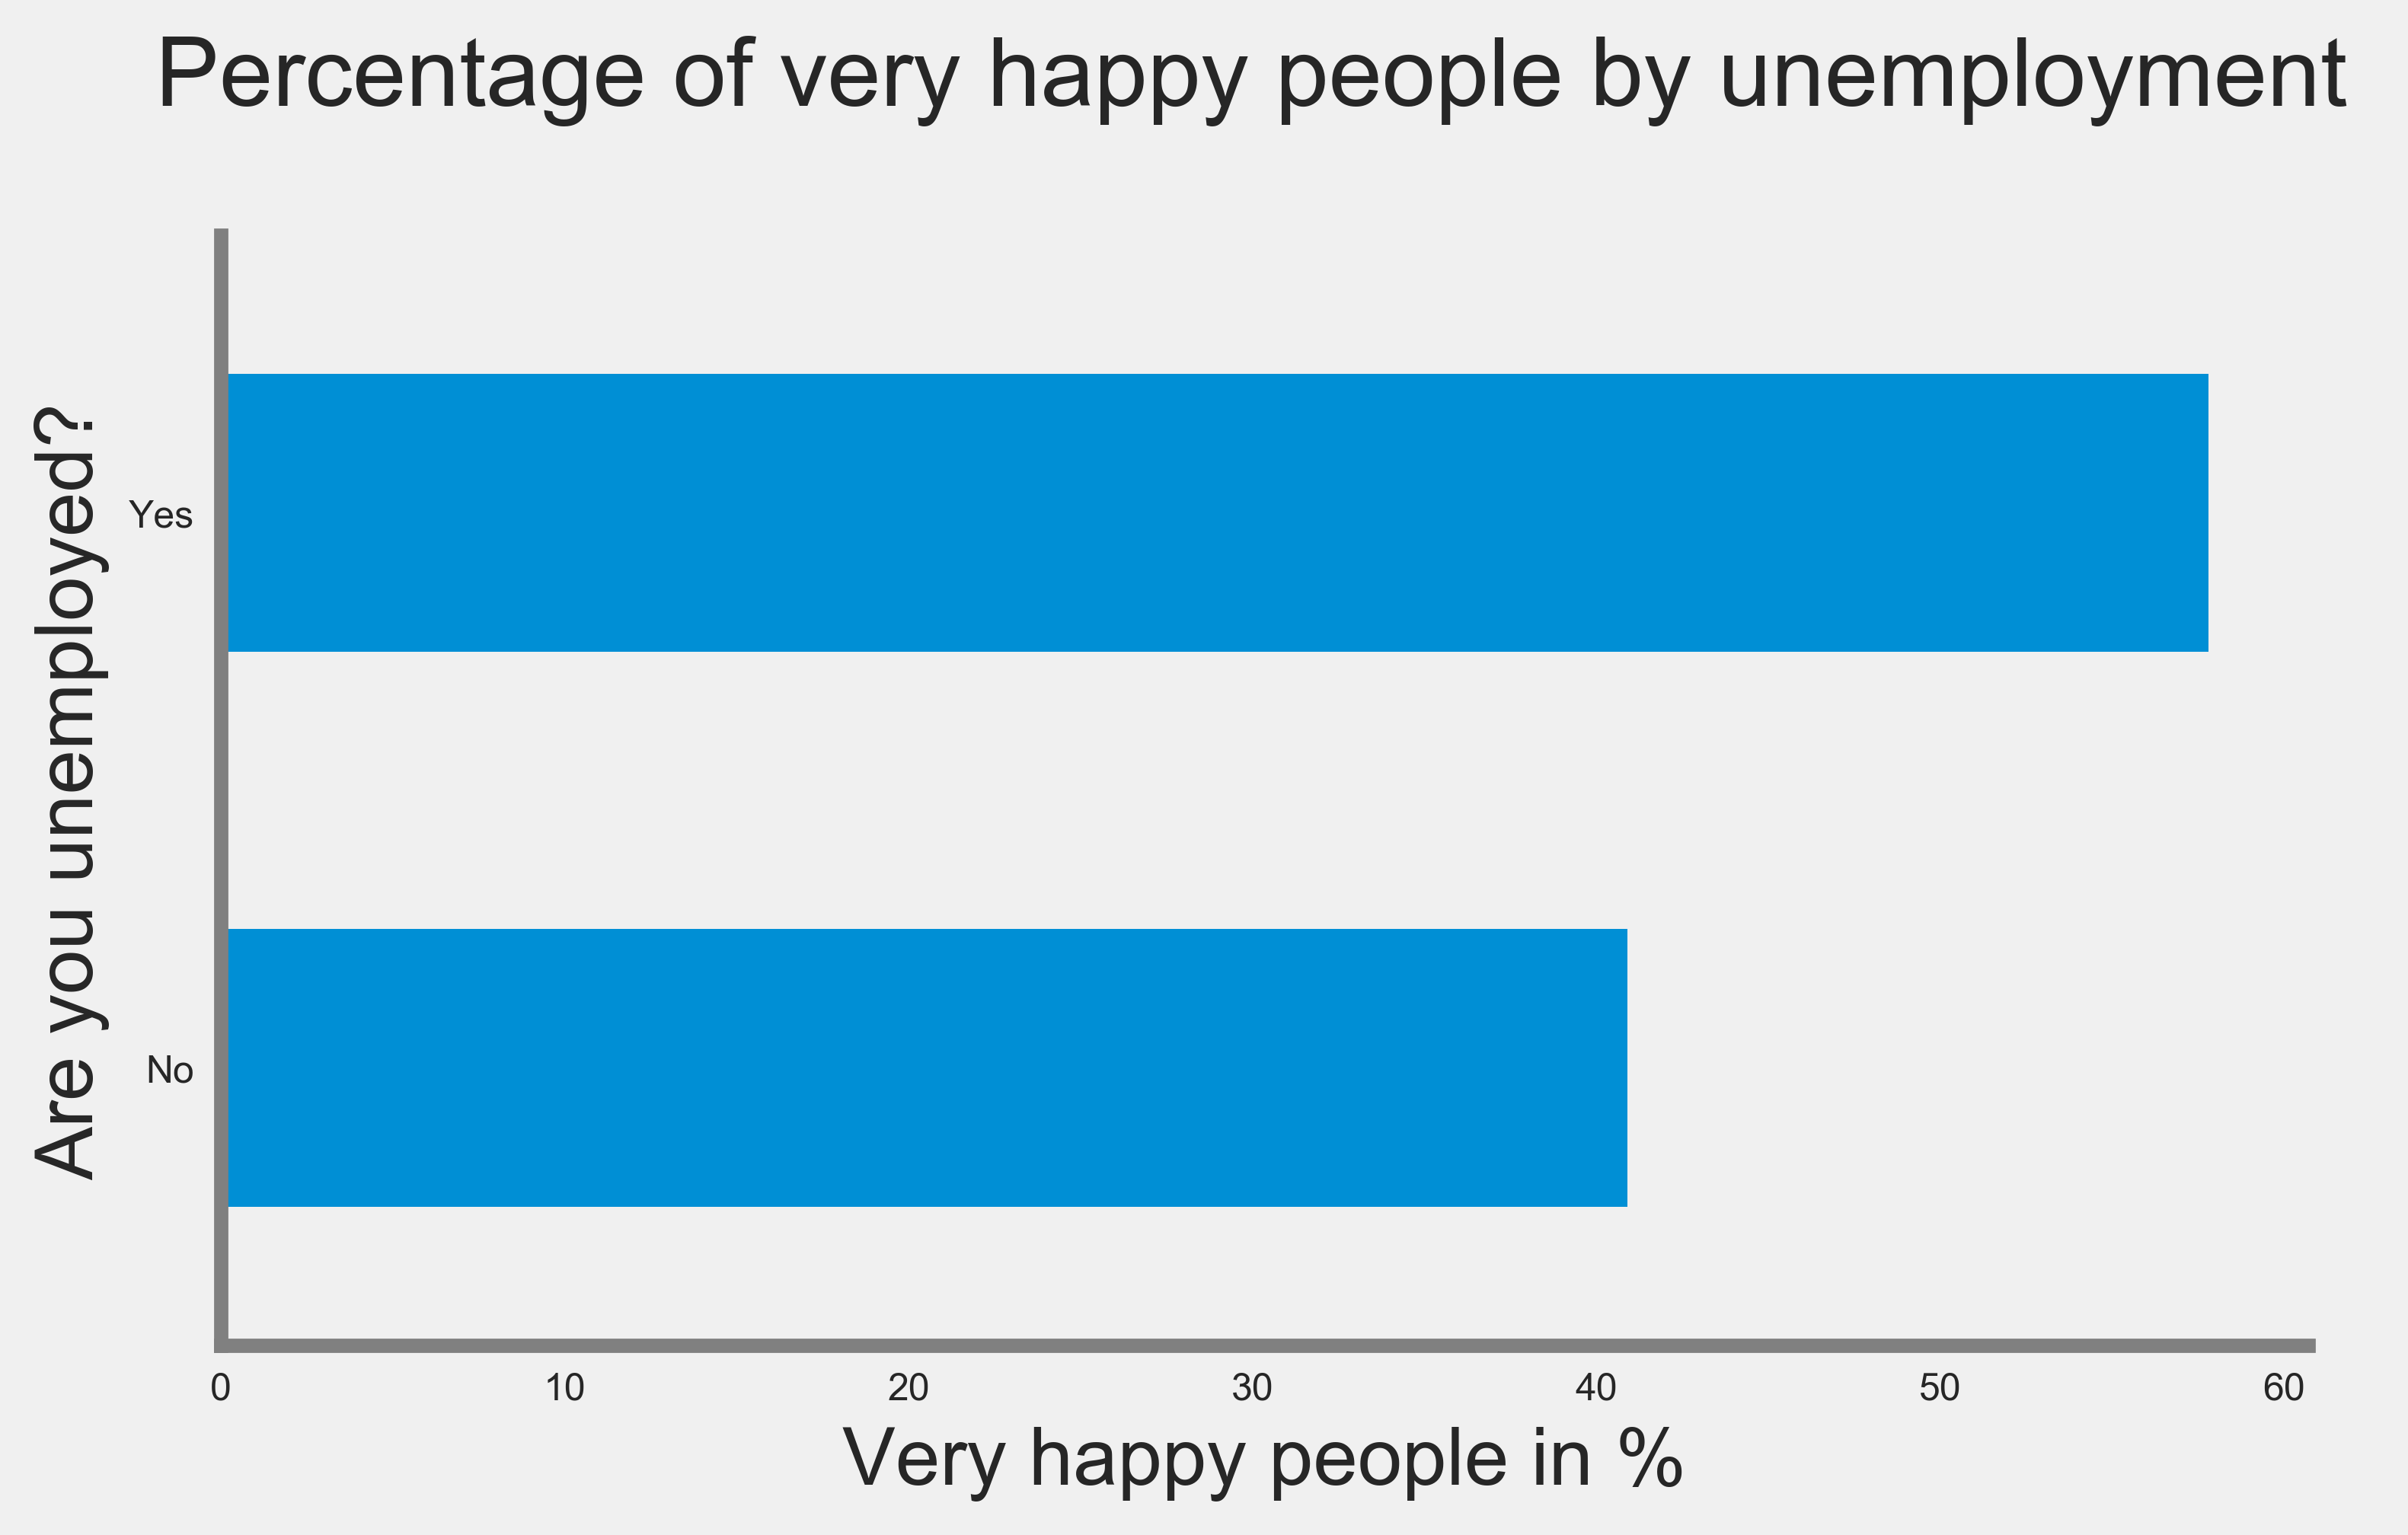

In [335]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

data_2014['not_unemployed'] = (data_2014.uempla != 'Marked') & (data_2014.uempli != 'Marked')

ax = (data_2014.groupby(['not_unemployed'])['very_happy'].sum() / data_2014.groupby(['not_unemployed'])['very_happy'].count() * 100).\
    plot(kind='barh',figsize=(7,4))
    
ax.figure.set_dpi(450)

ax.set_title('Percentage of very happy people by unemployment \n')
ax.yaxis.grid()
ax.xaxis.grid()

ax.set_yticklabels(['No','Yes'])

ax.set_ylabel('Are you unemployed?')
ax.set_xlabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

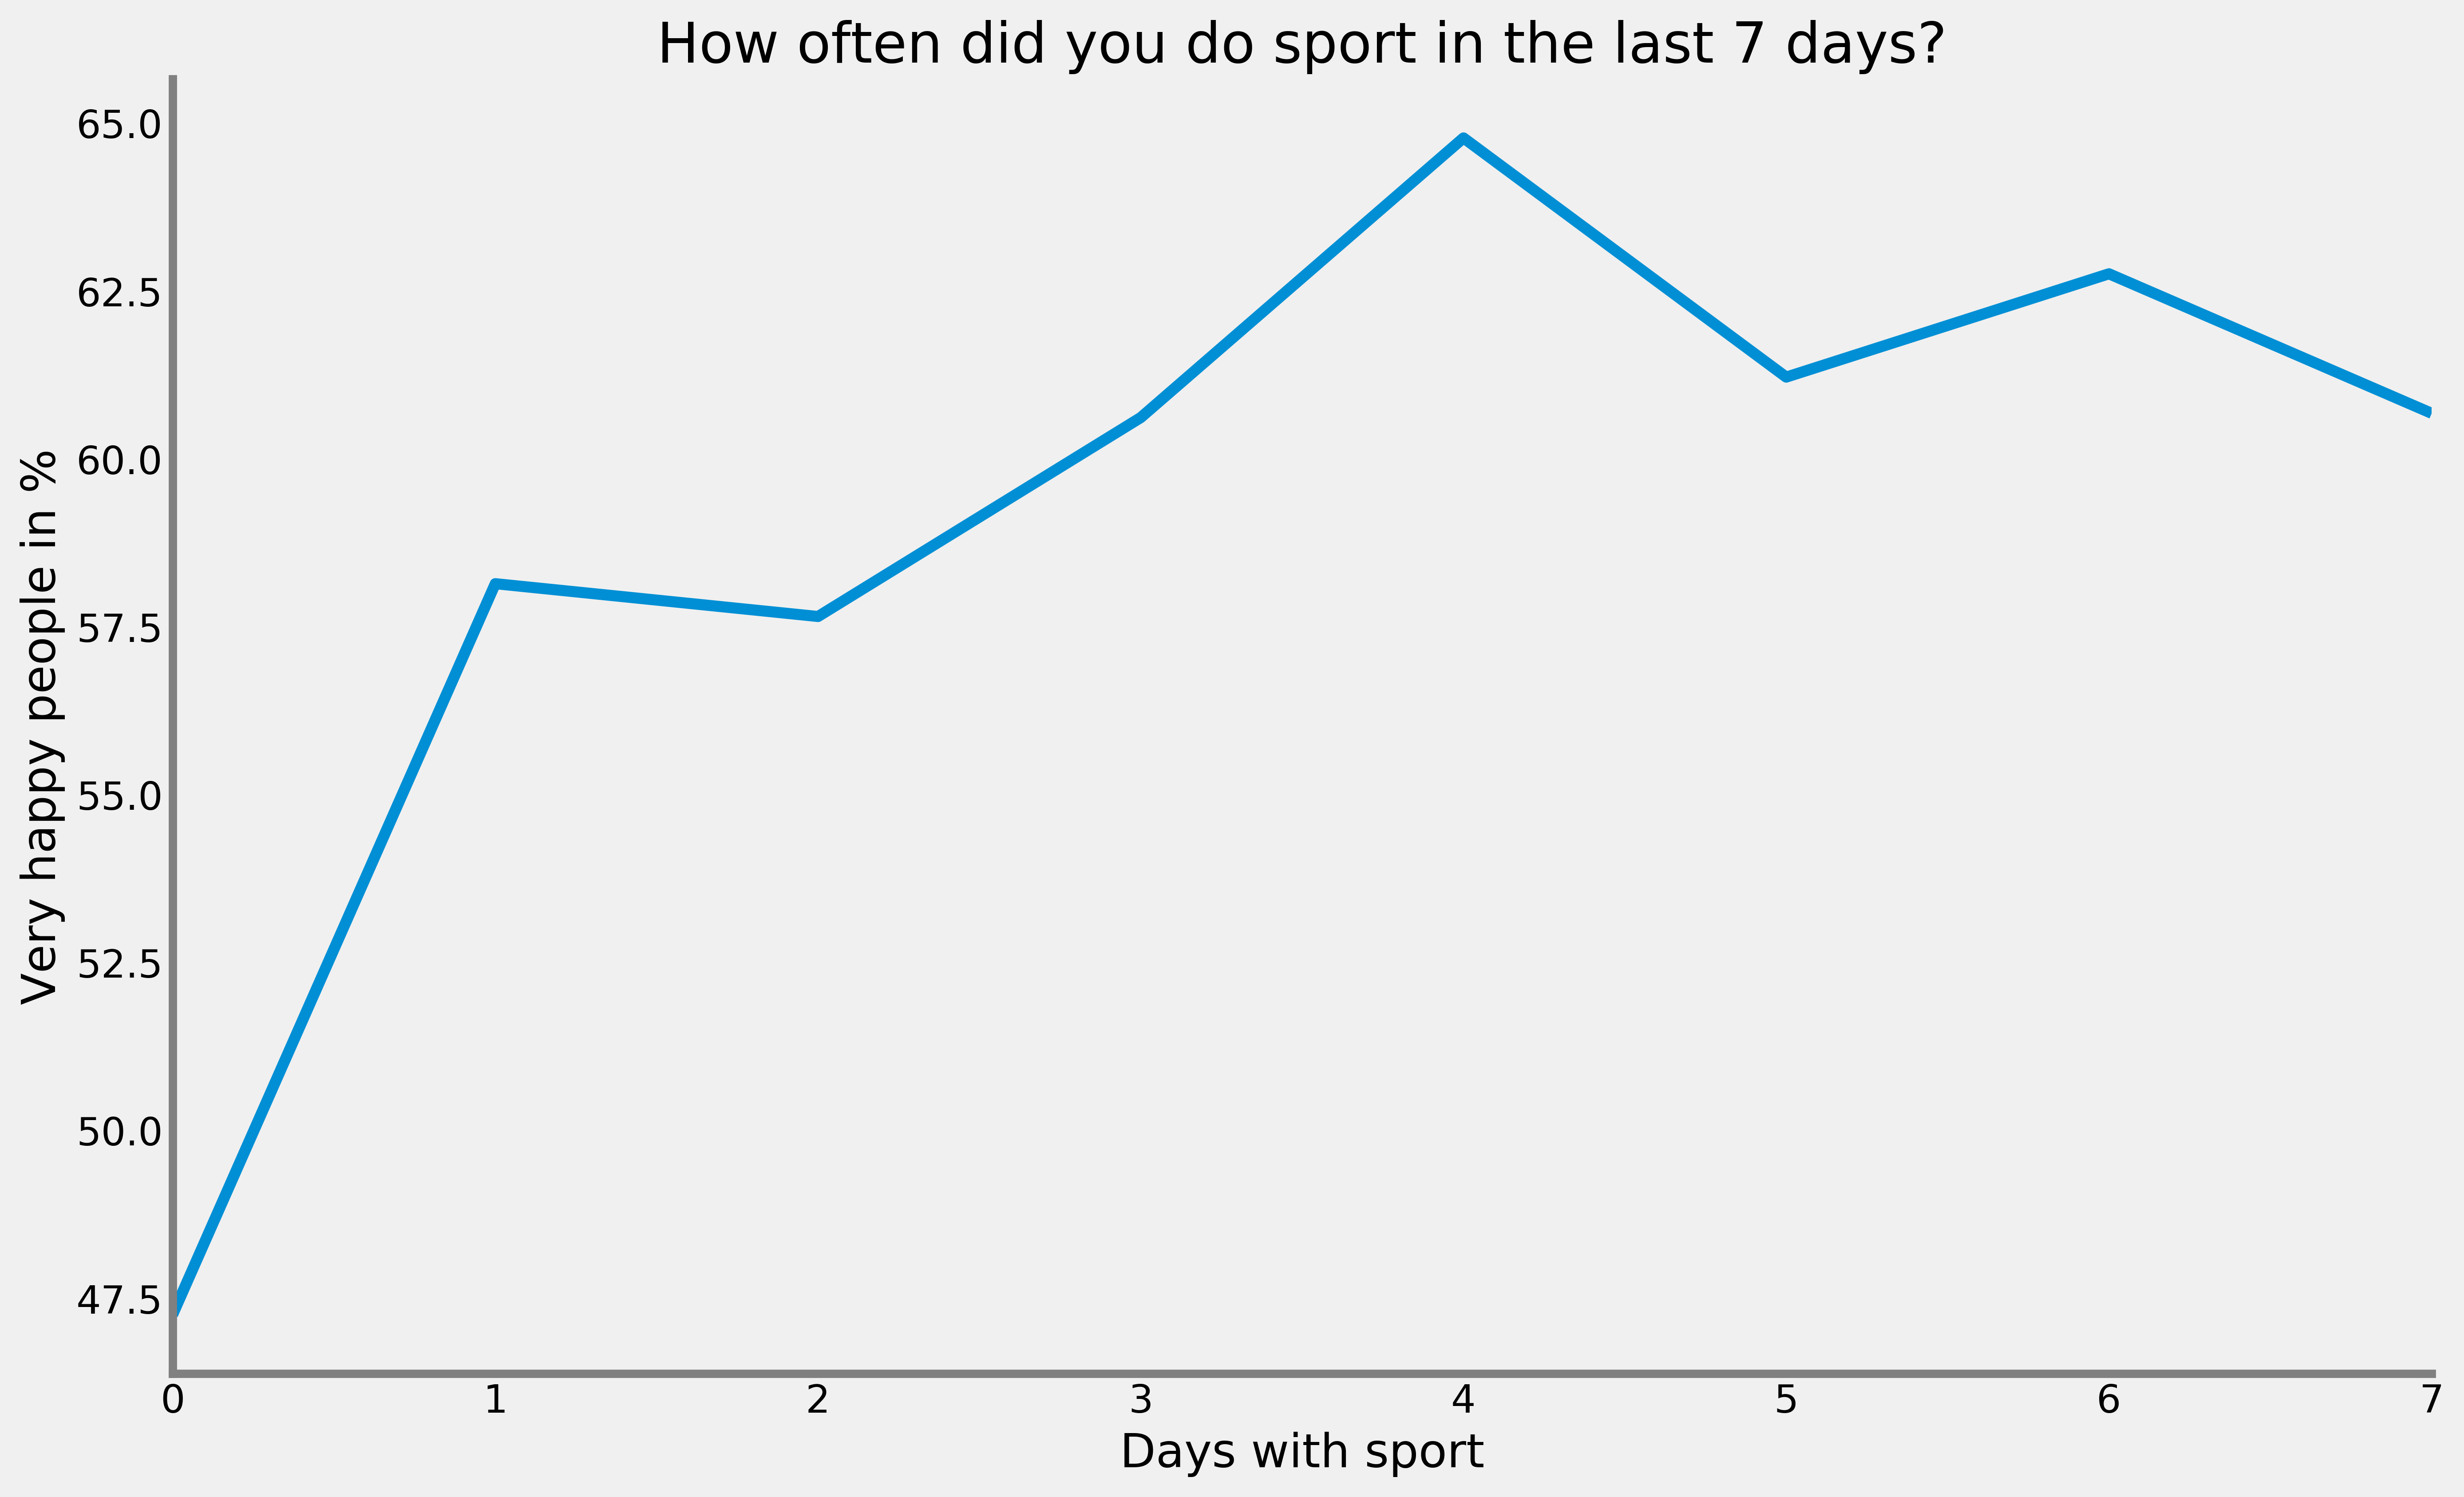

In [15]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

ax = (data_2014.groupby('dosprt')['very_happy'].sum() / data_2014.groupby('dosprt')['very_happy'].count() * 100).\
    plot(figsize=(13,8))
    
ax.figure.set_dpi(450)

ax.set_title('How often did you do sport in the last 7 days?')
ax.yaxis.grid()
ax.xaxis.grid()

x = [0,1,2,3,4,5,6,7]


ax.set_xticklabels(x)

ax.set_xlabel('Days with sport')
ax.set_ylabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('sport.eps', format='eps', dpi=100) 

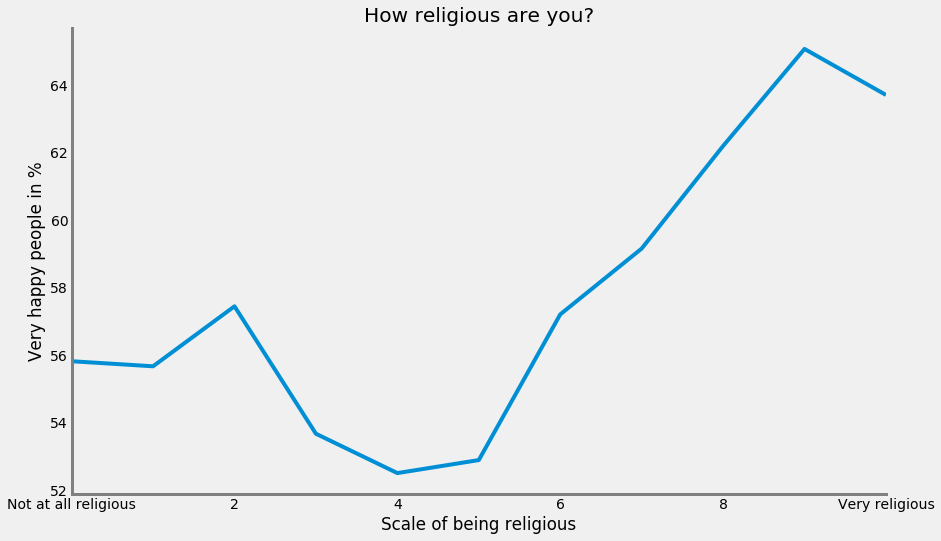

In [17]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

ax = (data_2014.groupby('rlgdgr')['very_happy'].sum() / data_2014.groupby('rlgdgr')['very_happy'].count() * 100).\
    plot(figsize=(13,8))


ax.set_title('How religious are you?')
ax.yaxis.grid()
ax.xaxis.grid()



ax.set_xlabel('Scale of being religious')
ax.set_ylabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('religious.eps', format='eps', dpi=100) 

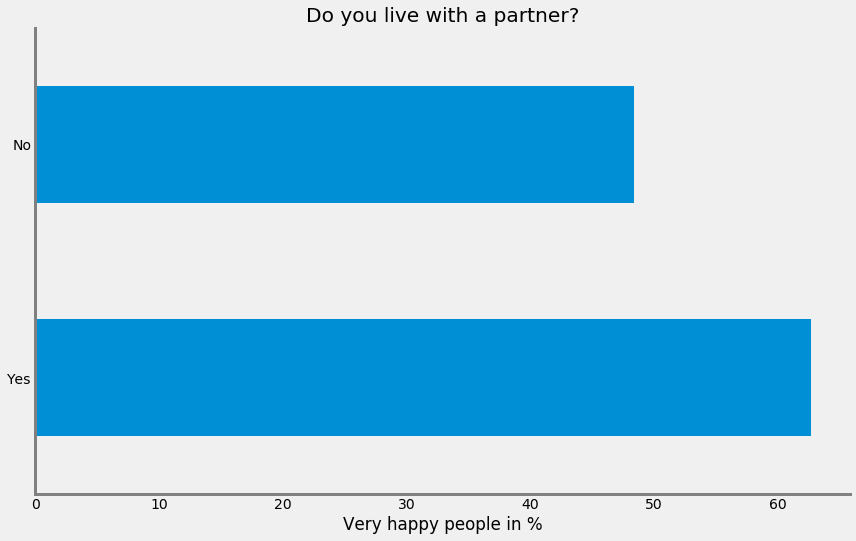

In [18]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

ax = (data_2014.groupby('icpart1')['very_happy'].sum() / data_2014.groupby('icpart1')['very_happy'].count() * 100).\
    plot(kind='barh',figsize=(13,8))
    
ax.set_title('Do you live with a partner?')
ax.yaxis.grid()
ax.xaxis.grid()

y = ["Yes","No"]

ax.set_yticklabels(y)

ax.set_ylabel('')
ax.set_xlabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('partner.eps', format='eps', dpi=100) 

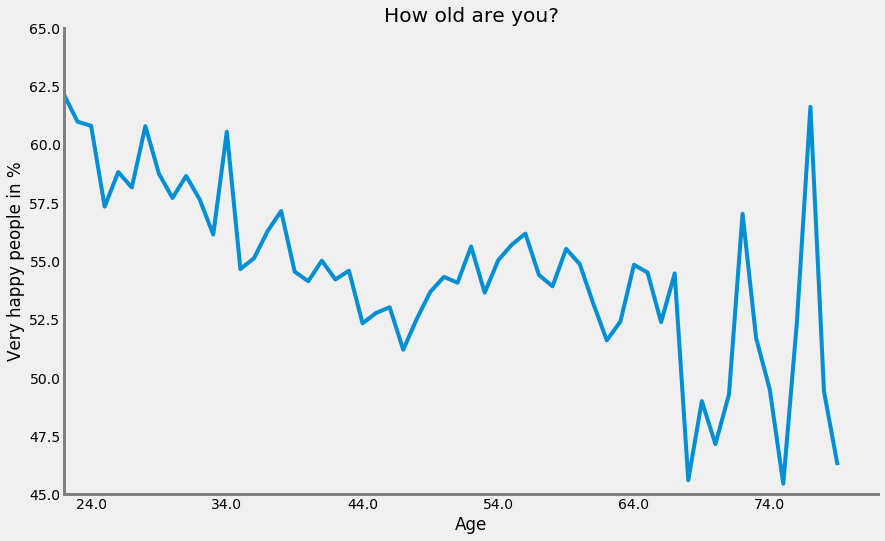

In [21]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

age = data_2014[(data_2014.agea.astype(float) < 90) & (data_2014.agea.astype(float) >17)]

ax = (age.groupby('agea')['very_happy'].sum() / age.groupby('agea')['very_happy'].count() * 100).\
    plot(figsize=(13,8))

ax.set_title('How old are you?')
ax.yaxis.grid()
ax.xaxis.grid()

ax.axes.set_xlim(18,78)
ax.axes.set_ylim(45,65)

ax.set_xlabel('Age')
ax.set_ylabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('age.eps', format='eps', dpi=100)

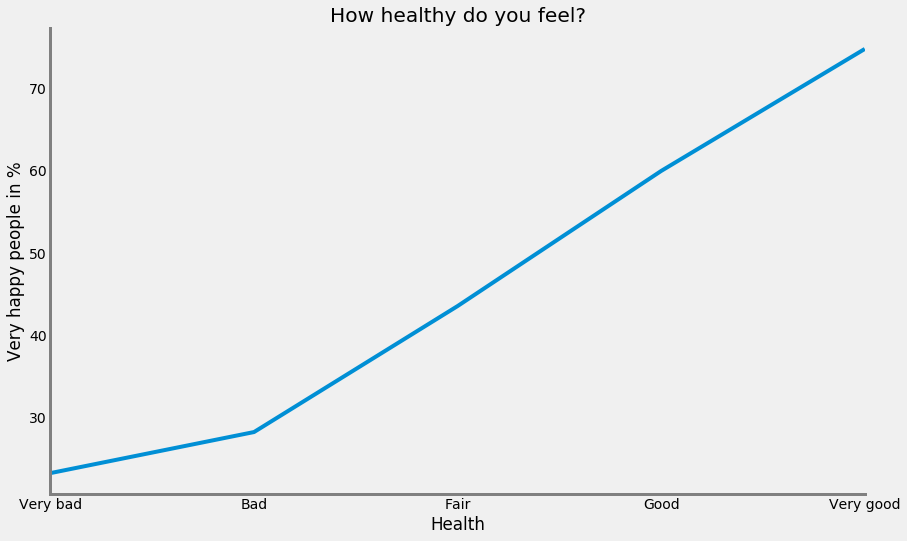

In [22]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

ax = (data_2014.groupby('health')['very_happy'].sum() / data_2014.groupby('health')['very_happy'].count() * 100).\
    sort_values(ascending=True).plot(figsize=(13,8))

ax.set_title('How healthy do you feel?')
ax.yaxis.grid()
ax.xaxis.grid()

ax.set_xlabel('Health')
ax.set_ylabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('health.eps', format='eps', dpi=100)

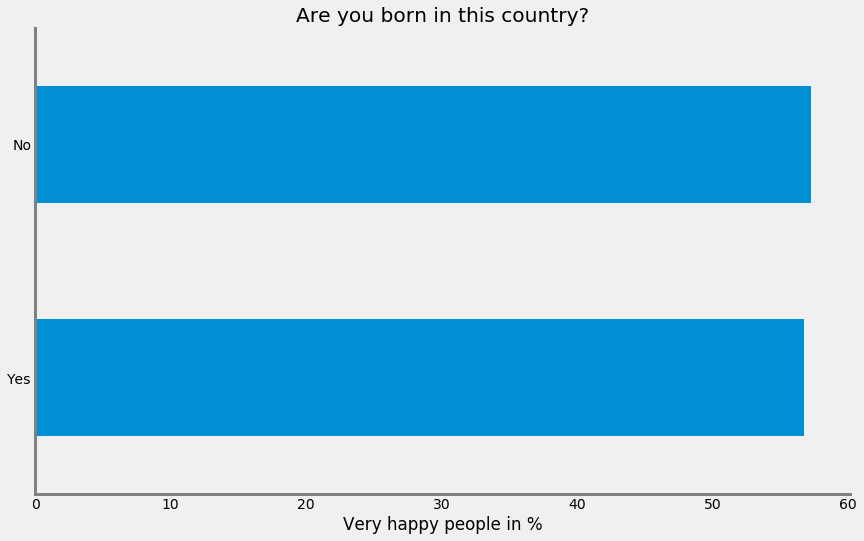

In [23]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

ax = (data_2014.groupby('brncntr')['very_happy'].sum() / data_2014.groupby('brncntr')['very_happy'].count() * 100).\
    plot(kind='barh',figsize=(13,8))

ax.set_title('Are you born in this country?')
ax.yaxis.grid()
ax.xaxis.grid()


ax.set_ylabel('')
ax.set_xlabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('immigrant.eps', format='eps', dpi=100) 

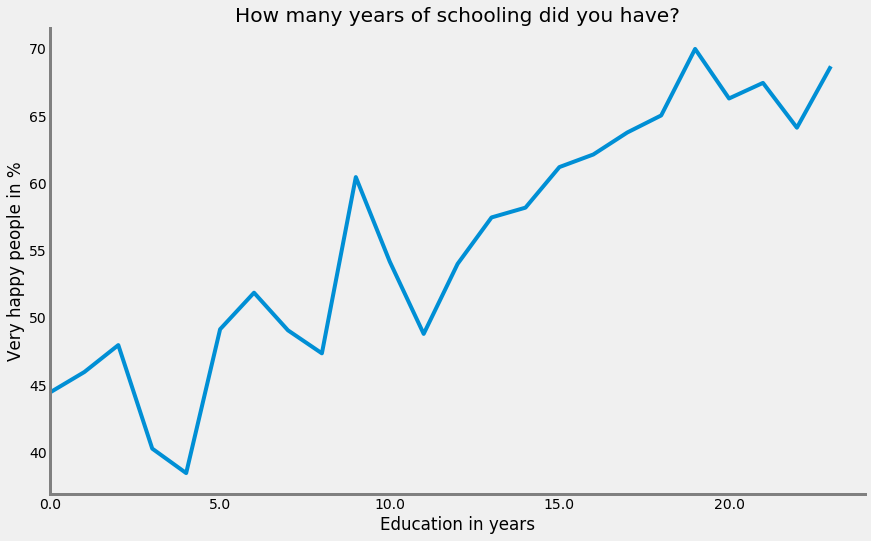

In [24]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

education = data_2014[(data_2014.eduyrs.astype(float) < 24)]

ax = (education.groupby('eduyrs')['very_happy'].sum() / education.groupby('eduyrs')['very_happy'].count() * 100).\
    plot(figsize=(13,8))

ax.axes.set_xlim(0,24)

ax.set_title('How many years of schooling did you have?')
ax.yaxis.grid()
ax.xaxis.grid()

ax.set_xlabel('Education in years')
ax.set_ylabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('education.eps', format='eps', dpi=100) 

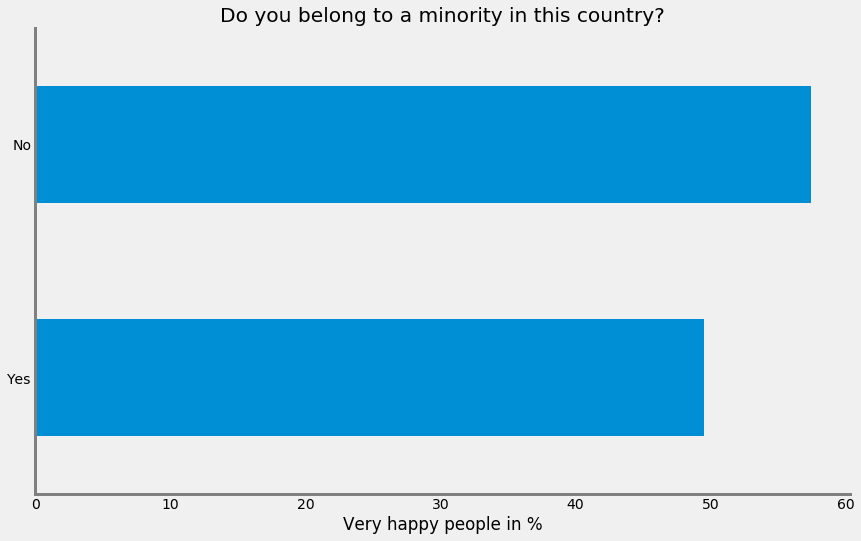

In [25]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')

ax = (data_2014.groupby('blgetmg')['very_happy'].sum() / data_2014.groupby('blgetmg')['very_happy'].count() * 100).\
    plot(kind='barh',figsize=(13,8))

ax.set_title('Do you belong to a minority in this country?')
ax.yaxis.grid()
ax.xaxis.grid()


ax.set_ylabel('')
ax.set_xlabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('minority.eps', format='eps', dpi=100) 

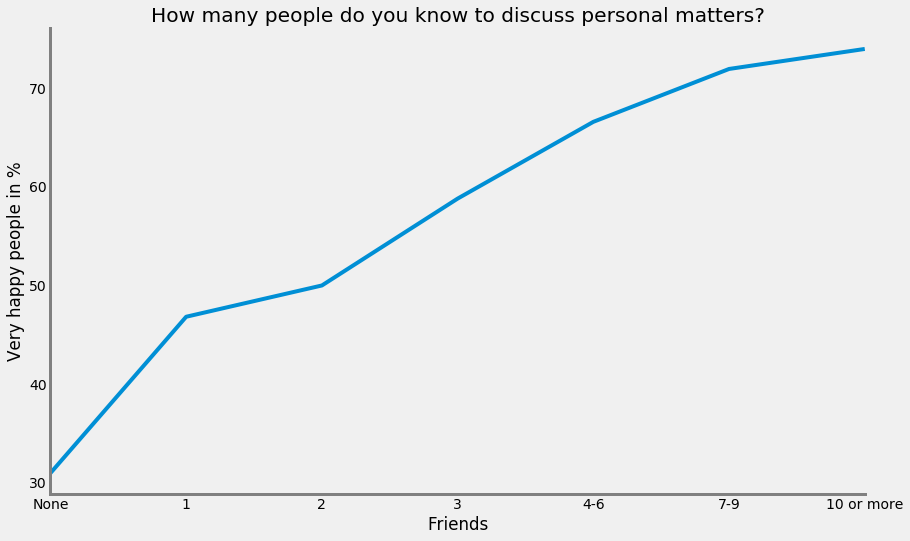

In [26]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')


ax = (data_2014.groupby('inprdsc')['very_happy'].sum() / data_2014.groupby('inprdsc')['very_happy'].count() * 100).\
    plot(figsize=(13,8))

ax.set_title('How many people do you know to discuss personal matters?')
ax.yaxis.grid()
ax.xaxis.grid()

ax.set_xlabel('Friends')
ax.set_ylabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('friends.eps', format='eps', dpi=100) 

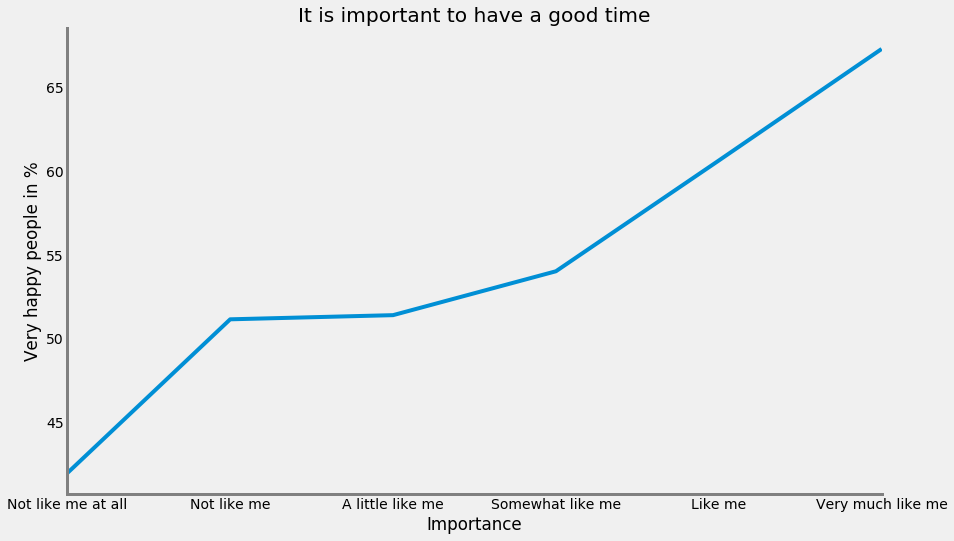

In [27]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')


ax = (data_2014.groupby('ipgdtim')['very_happy'].sum() / data_2014.groupby('ipgdtim')['very_happy'].count() * 100).\
    sort_values(ascending=True).plot(figsize=(13,8))

ax.set_title('It is important to have a good time')
ax.yaxis.grid()
ax.xaxis.grid()

ax.set_xlabel('Importance')
ax.set_ylabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('attitude1.eps', format='eps', dpi=100) 

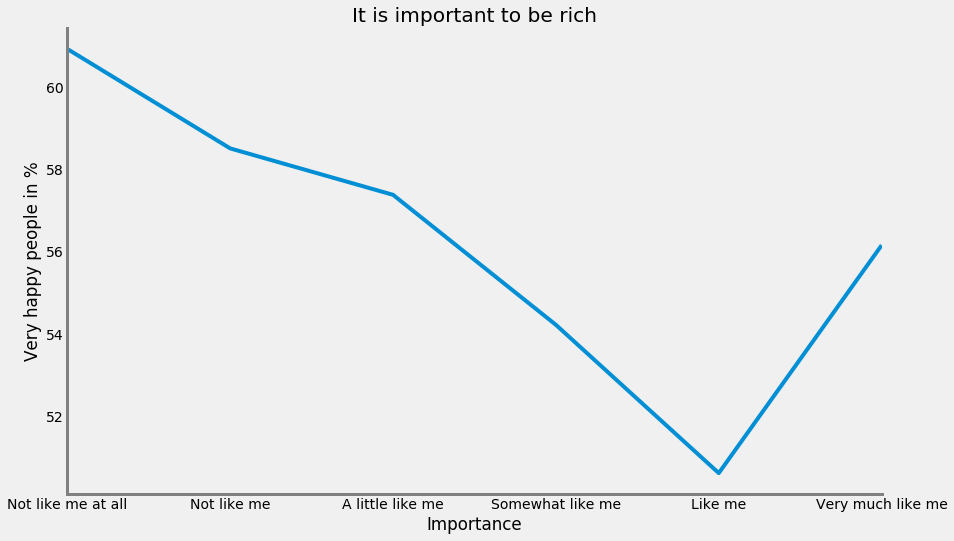

In [28]:
fig = plt.subplot()

plt.style.use('fivethirtyeight')


ax = (data_2014.groupby('imprich')['very_happy'].sum() / data_2014.groupby('imprich')['very_happy'].count() * 100).\
    plot(figsize=(13,8))
    
ax.invert_xaxis()

ax.set_title('It is important to be rich')
ax.yaxis.grid()
ax.xaxis.grid()

ax.set_xlabel('Importance')
ax.set_ylabel('Very happy people in %')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.patch.set_alpha(1)
ax.patch.set_alpha(1)

plt.savefig('attitude2.eps', format='eps', dpi=100) 

In [42]:
data_2014['age_bracket'] = round(data_2014.agea.astype(float)/10,0)

def friends_sum(row):
    friends_bracket = 0
    if row['inprdsc'] in ['None']:
        friends_bracket = 0
    if row['inprdsc'] in ['1', '2']:
        friends_bracket = 1
    if row['inprdsc'] in ['3']:
        friends_bracket = 2
    if row['inprdsc'] in ['4-6']:
        friends_bracket = 3
    if row['inprdsc'] in ['7-9', '10 or more']:
        friends_bracket = 4
        
    return pd.Series ({
        'friends_bracket' : friends_bracket
    })

def income_sum(row):
    income_bracket = 0

    if row['hinctnta'] in ['J - 1st decile', 'R - 2nd decile']:
        income_bracket = 0
    if row['hinctnta'] in ['C - 3rd decile', 'M - 4th decile']:
        income_bracket = 1
    if row['hinctnta'] in ['F - 5th decile', 'S - 6th decile']:
        income_bracket = 2
    if row['hinctnta'] in ['K - 7th decile', 'P - 8th decile']:
        income_bracket = 3
    if row['hinctnta'] in ['D - 9th decile', 'H - 10th decile']:
        income_bracket = 4
        
    return pd.Series ({
        'income_bracket' : income_bracket
    })

def health_sum(row):
    health_bracket = 0
    
    if row['health'] in ['Bad', 'Very bad']:
        health_bracket = 0
    if row['health'] in ['Fair']:
        health_bracket = 1
    if row['health'] in ['Very good', 'Good']:
        health_bracket = 2
        
    return pd.Series ({
        'health_bracket' : health_bracket
    })

def religious_sum(row):
    religious_bracket = 0
    
    if row['rlgdgr'] in ['Not at all religious','1','2']:
        religious_bracket = 0
    if row['rlgdgr'] in ['3','4']:
        religious_bracket = 1
    if row['rlgdgr'] in ['5','6']:
        religious_bracket = 2
    if row['rlgdgr'] in ['7','8']:
        religious_bracket = 3
    if row['rlgdgr'] in ['9','Very religious']:
        religious_bracket = 4
        
    return pd.Series ({
        'religious_bracket' : religious_bracket
    })

data_2014 = data_2014.join(data_2014.apply(health_sum, axis=1))

In [47]:
data_2014 = data_2014.join(data_2014.apply(religious_sum, axis=1))
data_2014 = data_2014.join(data_2014.apply(income_sum, axis=1))
data_2014 = data_2014.join(data_2014.apply(friends_sum, axis=1))

In [63]:
grouped_table_happy = data_2014.groupby(['age_bracket','health_bracket','religious_bracket','income_bracket','friends_bracket'])['very_happy'].sum() / \
data_2014.groupby(['age_bracket','health_bracket','religious_bracket','income_bracket','friends_bracket'])['very_happy'].count() * 100

In [64]:
grouped_table_count = data_2014.groupby(['age_bracket','health_bracket','religious_bracket','income_bracket','friends_bracket'])['very_happy'].count()

In [71]:
grouped_table_count.to_csv('count.csv')
grouped_table_happy.to_csv('happy.csv')